# <font color='blue'>Employee Dataset Analysis</font>

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [323]:
emp = pd.read_csv('Employee.csv')

In [324]:
emp.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [325]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [326]:
emp.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## <font color='blue'>EDA</font>

In [327]:
emp.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [328]:
emp['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

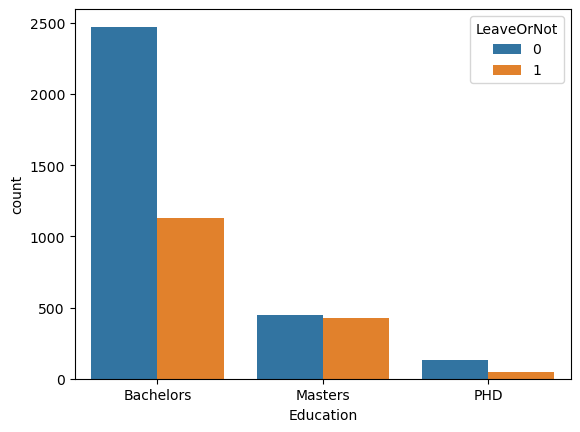

In [329]:
sns.countplot(x = 'Education', data = emp, hue = 'LeaveOrNot')

<Axes: xlabel='Education', ylabel='count'>

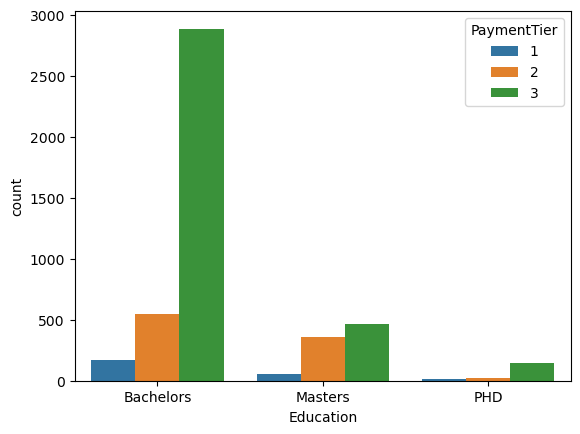

In [330]:
sns.countplot(x = 'Education', hue = 'PaymentTier', data = emp)

In [331]:
percba = len(emp[(emp['Education'] == 'Bachelors') & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['Education'] == 'Bachelors']) * 100
percma = len(emp[(emp['Education'] == 'Masters') & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['Education'] == 'Masters']) * 100
percphd = len(emp[(emp['Education'] == 'PHD') & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['Education'] == 'PHD']) * 100
print('BA leave rate:',percba,'%')
print('MA leave rate:',percma,'%')
print('PHD leave rate:',percphd,'%')

BA leave rate: 31.352402110524853 %
MA leave rate: 48.797250859106526 %
PHD leave rate: 25.139664804469277 %


#### * The education level between employees is dominated with BACHELORS with high margin, then comes MASTERS with more or less average quantity, then PHD with very small fraction of the sample
#### * MA leave rate is the highest, may because they are not paid well compared to BACHELORS

In [332]:
emp['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='PaymentTier', ylabel='count'>

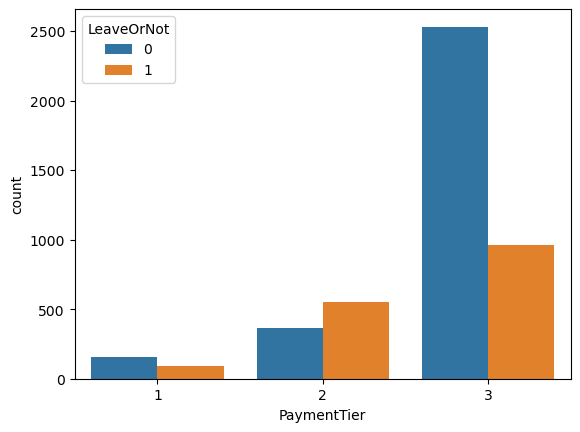

In [333]:
sns.countplot(x = 'PaymentTier', data = emp, hue = 'LeaveOrNot')

In [334]:
perc1 = len(emp[(emp['PaymentTier'] == 1) & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['PaymentTier'] == 1]) * 100
perc2 = len(emp[(emp['PaymentTier'] == 2) & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['PaymentTier'] == 2]) * 100
perc3 = len(emp[(emp['PaymentTier'] == 3) & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['PaymentTier'] == 3]) * 100
print('Tier1 Left:',perc1,'%')
print('Tier2 Left:',perc2,'%')
print('Tier3 Left:',perc3,'%')

Tier1 Left: 36.62551440329218 %
Tier2 Left: 59.912854030501094 %
Tier3 Left: 27.520045819014893 %


* #### As we see most of our employees in the sample are in the 3rd tier of income
* #### This may be explained by the Experiences of the employees since we have many Experienced (2 - 5) ones
* #### According to percentages of leavings, the one for Tier2 category is significantly high. It may occurs because, that most of the Tier2 employees are more or less experienced, thus thinking they deseve more and leave

In [335]:
emp['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='EverBenched', ylabel='count'>

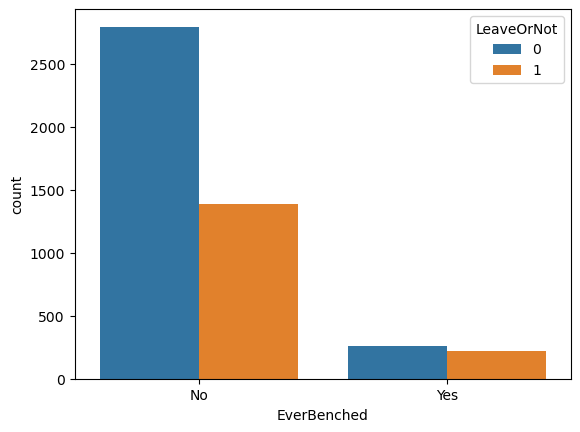

In [336]:
sns.countplot(x = 'EverBenched', data = emp, hue = 'LeaveOrNot')

In [337]:
benched_left = len(emp[(emp['EverBenched'] == 'Yes') & (emp['LeaveOrNot'] == 1)])
benched_total = len(emp[emp['EverBenched'] == 'Yes'])
perc_benched_left = benched_left / benched_total * 100
perc_benched_left

45.39748953974895

In [338]:
not_benched_left = len(emp[(emp['EverBenched'] == 'No') & emp['LeaveOrNot'] == 1])
not_benched_total = len(emp[emp['EverBenched'] == 'No'])
perc_not_benched_left = not_benched_left / not_benched_total * 100
perc_not_benched_left

33.125748502994014

* #### Very few of them has ever been benched but out of those who were ever benched many of them left eventually (45%)
* #### So I expect that EverBenched variable would be a somewhat strong one

In [339]:
emp['ExperienceInCurrentDomain'].unique()

array([0, 3, 2, 5, 1, 4, 7, 6], dtype=int64)

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

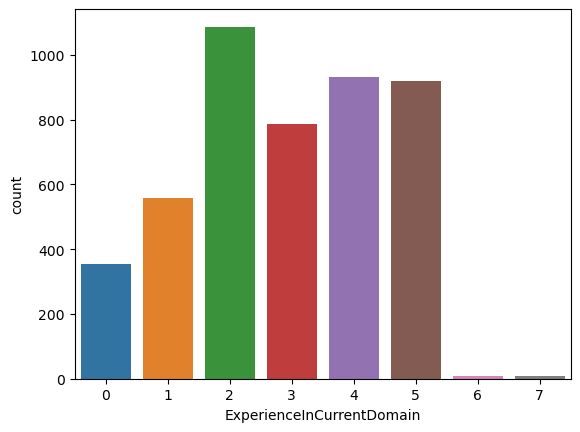

In [340]:
sns.countplot(x = 'ExperienceInCurrentDomain', data = emp)

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

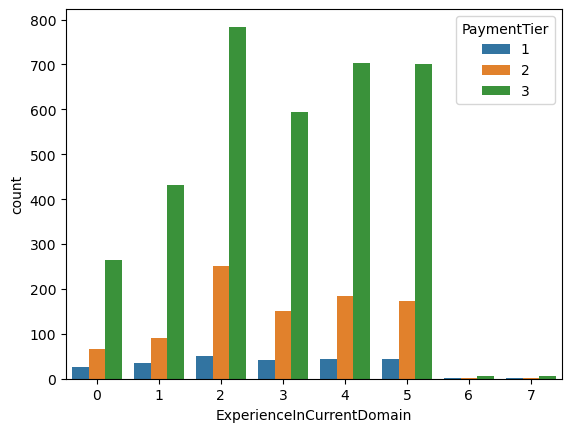

In [341]:
sns.countplot(data = emp, x = 'ExperienceInCurrentDomain', hue = 'PaymentTier')

(0.0, 10.0)

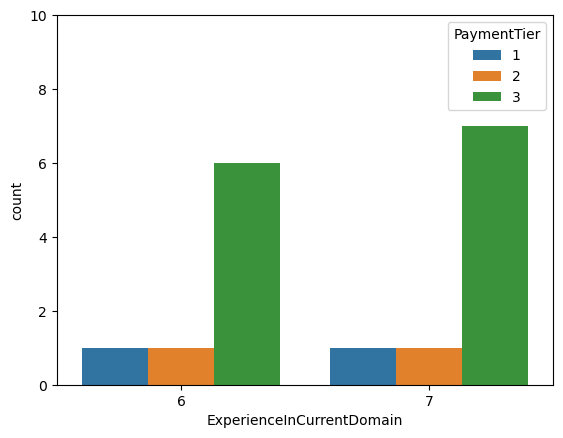

In [342]:
sns.countplot(data = emp, x = 'ExperienceInCurrentDomain', hue = 'PaymentTier')
plt.xlim(5.5,7.5)
plt.ylim(0,10)

In [343]:
percent = list()

for i in np.sort(emp['ExperienceInCurrentDomain'].unique()) :
    all_of_them = len(emp[emp['ExperienceInCurrentDomain'] == i])
    paid_well = len(emp[(emp['ExperienceInCurrentDomain'] == i) & (emp['PaymentTier'] == 3)])
    percent_paid_well = round(paid_well / all_of_them * 100)
    percent.append(percent_paid_well)
    
pd.DataFrame({'Experience Level': range(0,8),
             'Percent Paid Well %' : percent} )

,Experience Level,Percent Paid Well %
0,0,74
1,1,77
2,2,72
3,3,76
4,4,76
5,5,76
6,6,75
7,7,78


* #### If we suppose that TIER 3 Payment is "Well-Paid" state, then above are the percenteges of experienced people "Paid-Well"
* #### Other fraction of employees maybe ones that are dissatisfied and are objects of leaving, which we will examine now

In [344]:
not_well = []

for i in np.sort(emp['ExperienceInCurrentDomain'].unique()) :
    not_paid_well = len(emp[(emp['ExperienceInCurrentDomain'] == i) & (emp['PaymentTier'] != 3)])
    not_paid_well_and_left = len(emp[(emp['ExperienceInCurrentDomain'] == i) & (emp['PaymentTier'] != 3) & (emp['LeaveOrNot'] == 1)])
    percent_not_paid_well_and_left = round(not_paid_well_and_left / not_paid_well * 100, 2)
    not_well.append(percent_not_paid_well_and_left)

pd.DataFrame({'Experience Level': range(0,8),
             'Not Paid Well and Left %': not_well})    

,Experience Level,Not Paid Well and Left %
0,0,60.44
1,1,53.97
2,2,53.14
3,3,60.73
4,4,56.39
5,5,50.68
6,6,0.00
7,7,0.00


* #### As we can see, payment is a huge factor for employees behaviour, and quite significant variable
* #### It is not shown (however, it is shown above) here but most of these fractions of not well paid leavers, comes from TIER 2 payment employees (who are not "PAID WELL"), so PaymentTier Variable may also be quite important

In [345]:
# Once again Percentages of leavers by PAYMENT TIER

for i in np.sort(emp['PaymentTier'].unique()):
    payment_tier_left_perc = round(len(emp[(emp['PaymentTier'] == i) & (emp['LeaveOrNot'] == 1)]) / len(emp[emp['PaymentTier'] == i])*100,2)
    print(payment_tier_left_perc)

36.63
59.91
27.52


<Axes: xlabel='Age', ylabel='count'>

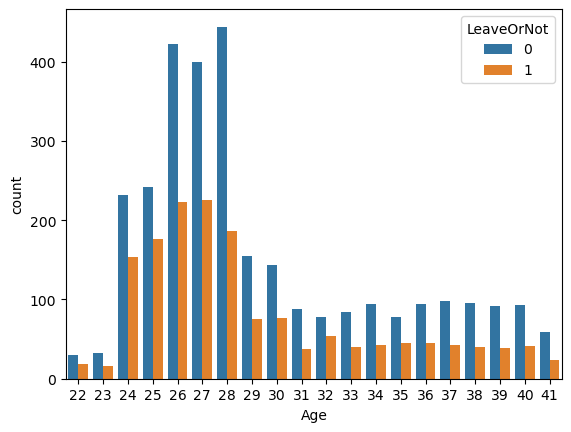

In [346]:
sns.countplot(data = emp, x = 'Age', hue = 'LeaveOrNot')

In [347]:
emp['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41], dtype=int64)

In [348]:
perc_left_age = []

for age in emp['Age'].unique():
    num_of_emp = len(emp[emp['Age'] == age])
    num_of_left = len(emp[(emp['Age'] == age) & (emp['LeaveOrNot'] == 1)])
    perc_left = num_of_left / num_of_emp * 100
    perc_left_age.append(perc_left)

pd.DataFrame({'Age' : emp['Age'].unique(),
             'Percentages' : perc_left_age}).sort_values('Percentages', ascending = False).reset_index().drop('index', axis = 1).head(10)

,Age,Percentages
0,25,42.105263
1,32,40.909091
2,24,39.740260
3,22,38.775510
4,35,36.585366
5,27,36.160000
6,30,35.000000
7,26,34.573643
8,23,33.333333
9,29,32.608696


* #### Interesting percentages

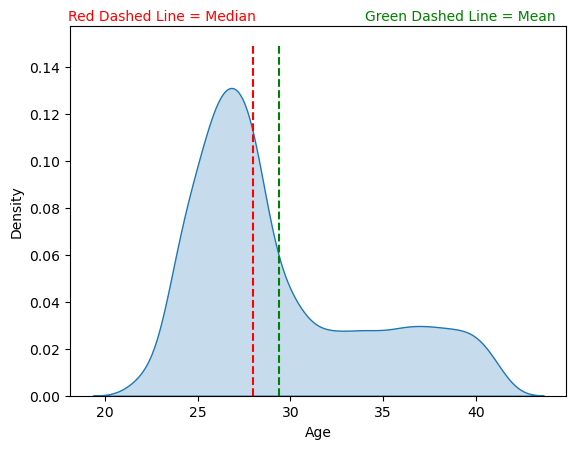

In [349]:
sns.kdeplot(x = 'Age', data = emp,  fill = True)
plt.vlines(x = emp['Age'].median(), ymin = 0, ymax = 0.15, color = 'red', linestyles = 'dashed')
plt.vlines(x = emp['Age'].mean(), ymin = 0, ymax = 0.15, color = 'green', linestyles = 'dashed')
plt.text(x = 18, y = 0.16, s = 'Red Dashed Line = Median', c = 'red')
plt.text(x = 34, y = 0.16, s = 'Green Dashed Line = Mean', c = 'green');

<Axes: xlabel='Age', ylabel='count'>

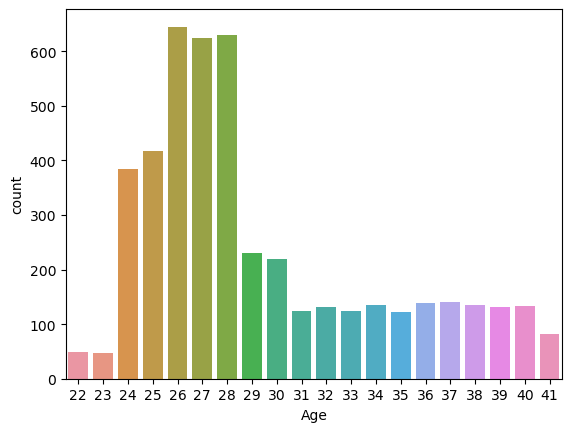

In [350]:
sns.countplot(data = emp, x = 'Age')

* #### From the plot of the Age Distribution of employees we can see that employees are mostly between 24 and 28 Years

<Axes: xlabel='City', ylabel='count'>

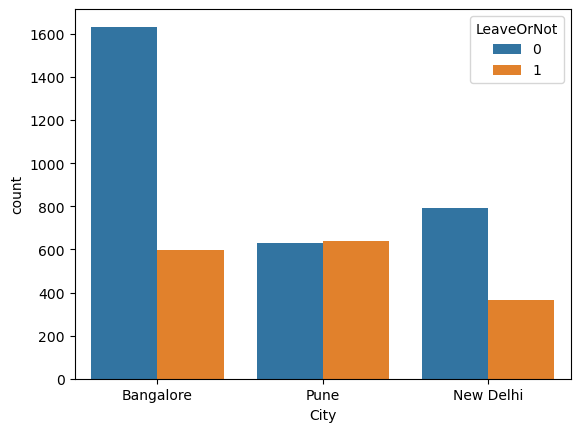

In [351]:
sns.countplot(x = 'City', data = emp, hue = 'LeaveOrNot')

In [352]:
perc_city = []
for city in emp['City'].unique():
    all_city_employees = len(emp[emp['City'] == city])
    left_city_employees = len(emp[(emp['City'] == city) & (emp['LeaveOrNot'] == 1)])
    perc_left_by_city = round(left_city_employees / all_city_employees * 100,2)
    perc_city.append(perc_left_by_city)
pd.DataFrame({'City' : emp['City'].unique(),
              'Perc_Left' : perc_city})    

,City,Perc_Left
0,Bangalore,26.71
1,Pune,50.39
2,New Delhi,31.63


* #### As we see from these results Pune has a highest leave rate by margin, so "City" variable may also be effective

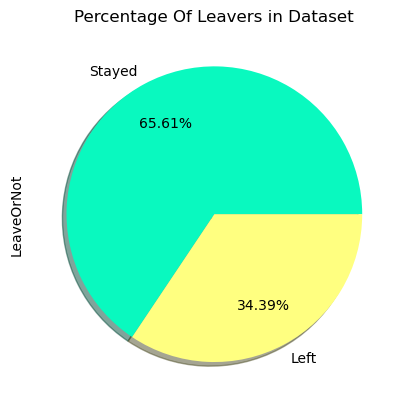

In [353]:
emp['LeaveOrNot'].value_counts().sort_values(ascending = False)\
.plot(kind = 'pie',
     title = 'Percentage Of Leavers in Dataset',
     labels = ['Stayed', 'Left'],
     colors = ['#09F9BF', '#FFFF80'],
     autopct = '%1.2f%%',
     pctdistance = 0.7,
     shadow = True)
plt.show()

* #### IMO not imbalanced data

In [354]:
emp.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

<Axes: xlabel='JoiningYear', ylabel='count'>

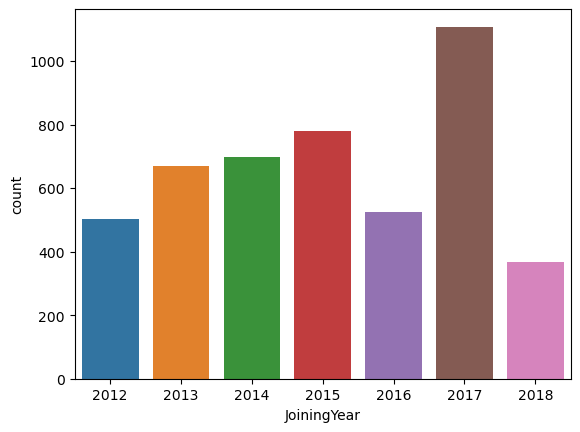

In [355]:
sns.countplot(data = emp, x = 'JoiningYear')

* #### Not very informative since I dont know which year the data was collected

<Axes: xlabel='Gender', ylabel='count'>

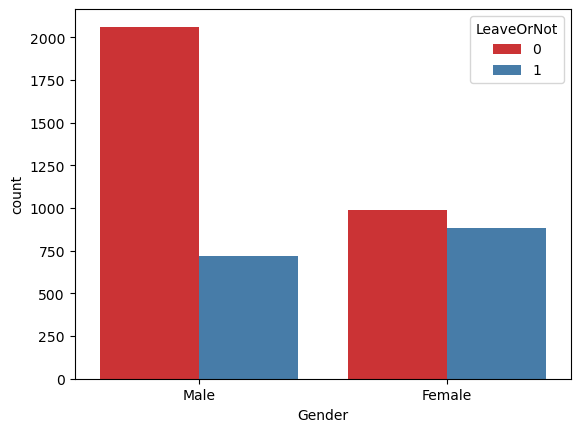

In [356]:
sns.countplot(data = emp, x = 'Gender', hue = 'LeaveOrNot', palette = 'Set1')

* #### Females are LEAVERS (According to the fractions displayed by countplot)

<Axes: xlabel='JoiningYear', ylabel='count'>

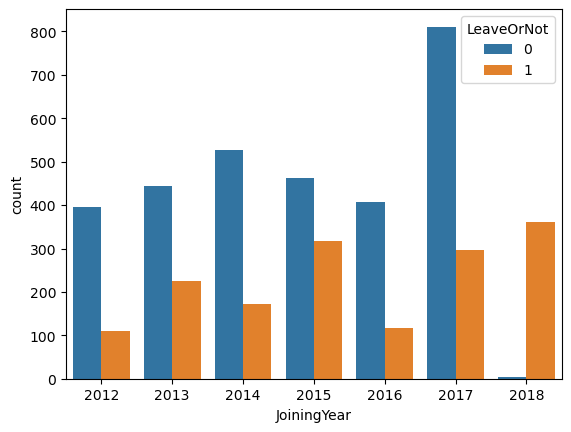

In [395]:
sns.countplot(x = 'JoiningYear', data = emp, hue = 'LeaveOrNot')

* #### 2018 employees are by far dominating leavers, it can be very important

## <font color='blue'>ML</font>

In [357]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [358]:
X_initial = emp.drop('LeaveOrNot', axis = 1)
y = emp['LeaveOrNot']

In [359]:
X = pd.get_dummies(X_initial, drop_first = True)

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [361]:
scaler = StandardScaler()

In [362]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [363]:
errors = []
models = []

#### Ultimate Function

In [364]:
def class_model(model, param_grid):
    
    grid_model = GridSearchCV(model, param_grid)
    
    grid_model.fit(scaled_X_train, y_train)
    print(grid_model.best_params_)
    
    preds = grid_model.predict(scaled_X_test)
    
    print(classification_report(y_test, preds))
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()
    
    error = 1 - accuracy_score(y_test, preds)
    errors.append(error)
    
    models.append(str(model))

{'C': 0.01}
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       639
           1       0.65      0.45      0.53       292

    accuracy                           0.75       931
   macro avg       0.72      0.67      0.68       931
weighted avg       0.74      0.75      0.74       931



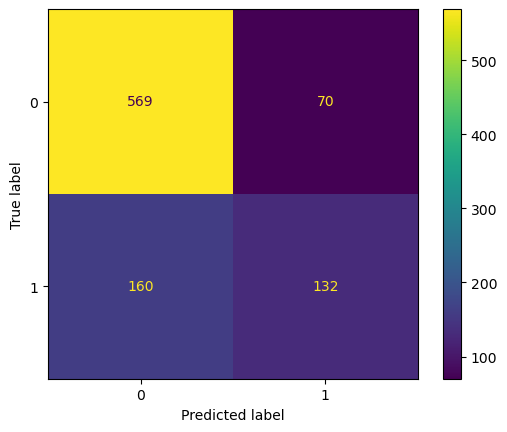

In [365]:
class_model(model = LinearSVC(), param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 50, 100]})

{'C': 10, 'degree': 2, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       639
           1       0.87      0.62      0.73       292

    accuracy                           0.85       931
   macro avg       0.86      0.79      0.81       931
weighted avg       0.86      0.85      0.84       931



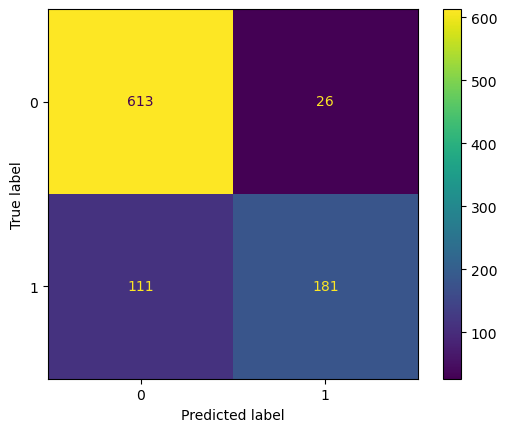

In [366]:
class_model(model = SVC(), param_grid = {'C' : [0.01, 0.1, 0.5, 1, 10, 50, 100],
                                        'kernel' : ['poly', 'rbf'],
                                        'degree' : [2, 3, 4, 5]})

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 128}
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       639
           1       0.90      0.49      0.63       292

    accuracy                           0.82       931
   macro avg       0.85      0.73      0.76       931
weighted avg       0.84      0.82      0.80       931



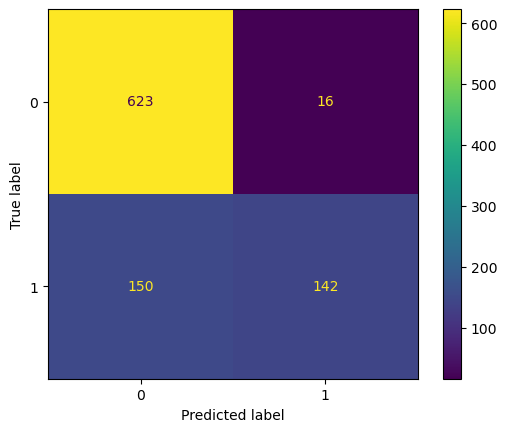

In [367]:
class_model(model = RandomForestClassifier(random_state = 101), param_grid = {'max_depth' : [3, 4],
                                                           'n_estimators' : [64, 100, 128, 500],
                                                           'max_features' : ["sqrt", "log2", len(X.columns)//3]})

{'n_neighbors': 11}
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       639
           1       0.78      0.55      0.65       292

    accuracy                           0.81       931
   macro avg       0.80      0.74      0.76       931
weighted avg       0.81      0.81      0.80       931



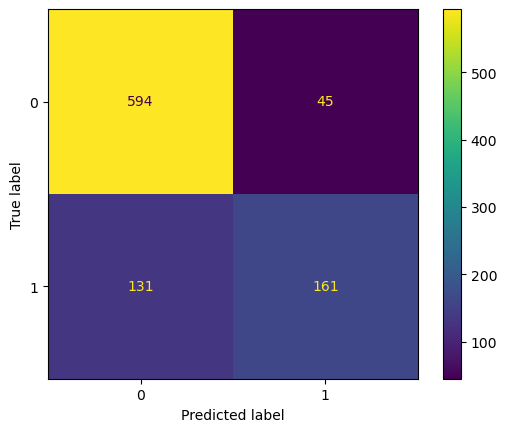

In [368]:
class_model(model = KNeighborsClassifier(), param_grid = {'n_neighbors' : range(1,30)})

{'learning_rate': 0.5, 'n_estimators': 1000}
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       639
           1       0.79      0.53      0.63       292

    accuracy                           0.81       931
   macro avg       0.80      0.73      0.75       931
weighted avg       0.81      0.81      0.80       931



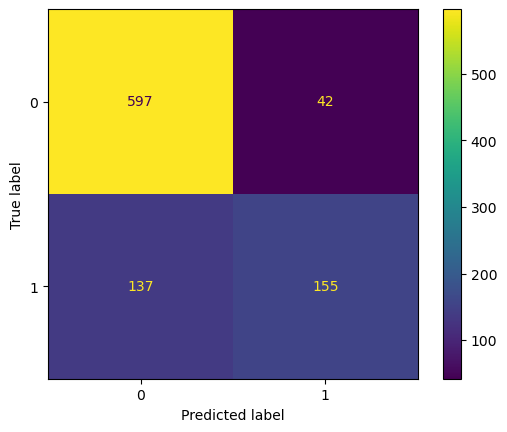

In [369]:
class_model(model = AdaBoostClassifier(random_state = 101), param_grid = {'learning_rate' : [0.01, 0.1, 0.5, 1],
                                                                          'n_estimators' : [30, 50, 100, 500, 1000]})

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       639
           1       0.89      0.64      0.74       292

    accuracy                           0.86       931
   macro avg       0.87      0.80      0.82       931
weighted avg       0.86      0.86      0.85       931



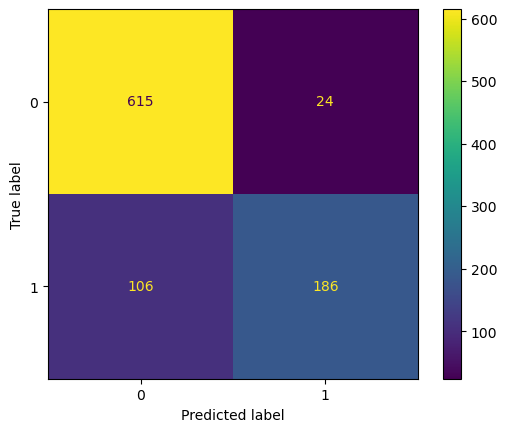

In [370]:
class_model(model = GradientBoostingClassifier(random_state = 101), param_grid = {'learning_rate' : [0.01, 0.1, 0.5, 1],
                                                                                  'n_estimators' : [30, 50, 100, 500, 1000],
                                                                                  'max_depth' : [3, 4, 5]})

In [371]:
models

['LinearSVC()',
 'SVC()',
 'RandomForestClassifier(random_state=101)',
 'KNeighborsClassifier()',
 'AdaBoostClassifier(random_state=101)',
 'GradientBoostingClassifier(random_state=101)']

In [372]:
errors

[0.24704618689581093,
 0.14715359828141783,
 0.17830290010741134,
 0.18904403866809882,
 0.19226638023630505,
 0.13963480128893657]

In [373]:
pd.DataFrame({'Models' : models,
             'Errors': errors}).sort_values(by = 'Errors')

,Models,Errors
5,GradientBoostingClassifier(random_state=101),0.139635
1,SVC(),0.147154
2,RandomForestClassifier(random_state=101),0.178303
3,KNeighborsClassifier(),0.189044
4,AdaBoostClassifier(random_state=101),0.192266
0,LinearSVC(),0.247046


#### GRADIENT BOOSTING ZE BEST!!!

In [376]:
"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}"

"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}"

In [377]:
final_model = GradientBoostingClassifier(random_state = 101,
                                        learning_rate = 0.1,
                                        max_depth = 5,
                                        n_estimators = 50)

In [378]:
final_model.fit(scaled_X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=101)

In [379]:
final_model.feature_importances_

array([0.36679536, 0.21824215, 0.047054  , 0.02992509, 0.11124178,
       0.01110989, 0.01789948, 0.12047997, 0.06045801, 0.01679428])

In [385]:
feat_imp = pd.DataFrame({'Explanatory Variable' : X.columns,
                         'Importance' : final_model.feature_importances_}).sort_values('Importance', ascending = False)
feat_imp

,Explanatory Variable,Importance
0,JoiningYear,0.366795
1,PaymentTier,0.218242
7,City_Pune,0.120480
4,Education_Masters,0.111242
8,Gender_Male,0.060458
2,Age,0.047054
3,ExperienceInCurrentDomain,0.029925
6,City_New Delhi,0.017899
9,EverBenched_Yes,0.016794
5,Education_PHD,0.011110


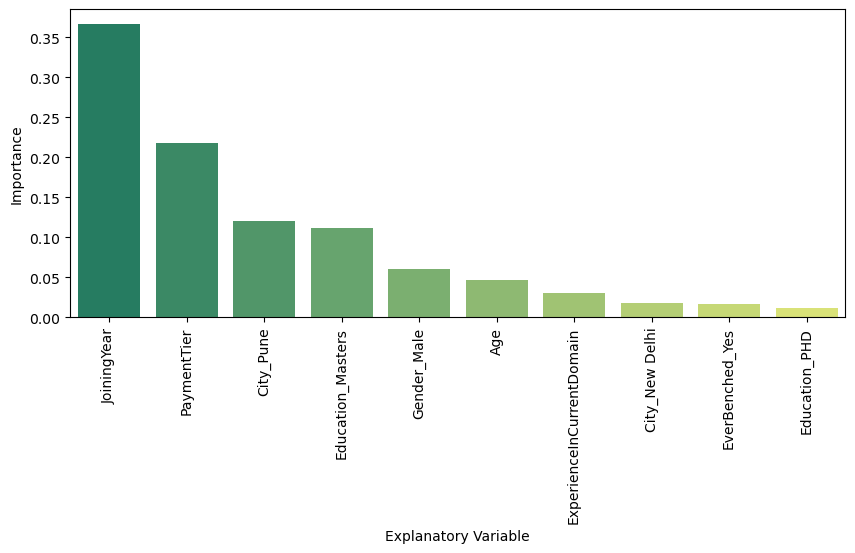

In [394]:
plt.figure(figsize = (10,4))
sns.barplot(data = feat_imp, x = 'Explanatory Variable', y = 'Importance', palette = 'summer')
plt.xticks(rotation = 90);

#### Some things that can be concluded now from the training is also seen in EDA, however still very valuable inferences can be done from the final process

In [398]:
import joblib

joblib.dump(final_model, 'employee_leaving_model.pkl')
joblib.dump(scaler, 'employee_leaving_scaler.pkl')
joblib.dump(X.columns, 'employee_leaving_columns.pkl')

['employee_leaving_columns.pkl']